# Capstone Project - Predicting Hosuing Prices in Moscow

<p>Loading the datasets:</p>
    <ul><li><p>train.csv</p></li>
    <li><p>test.csv</p></li>
    <li><p>macro.csv</p></li></ul>

In [2]:
#general
import time

#visuals
%pylab inline
import missingno as msn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)

#data prep
import pandas as pd 
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_squared_error

#ml algos
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
 
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

Populating the interactive namespace from numpy and matplotlib


C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


In [3]:
#loading train dataset
with open("train.csv", 'r') as f:
    train_df = pd.read_csv(f,  parse_dates=['timestamp'])
#loading test dataset
with open("test.csv", 'r') as f:
    test_df = pd.read_csv(f,  parse_dates=['timestamp'])
    #loading macro dataset
with open("macro.csv", 'r') as f:
    macro_df = pd.read_csv(f,  parse_dates=['timestamp'])

# Part 1 - Prepocessing

### So before we go into in depth analysis of the data lets have a first quick at the data 

In [4]:
display(train_df.head())
display(test_df.head())
display(macro_df.head())

C:\Users\Wegee\Anaconda3\lib\site-packages\IPython\core\formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Users\Wegee\Anaconda3\lib\site-packages\IPython\core\formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [5]:
display(train_df.shape)
display(train_df.describe())
display(test_df.shape)
display(test_df.describe())
display(macro_df.shape)
display(macro_df.describe())

(30471, 292)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


(7662, 291)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
count,7662.000000,7662.000000,6486.000000,7662.000000,7662.000000,7662.000000,6613.000000,7662.000000,7662.000000,6968.000000,...,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,34304.500000,53.701164,32.660037,7.652571,12.591099,1.854216,1820.888099,1.876403,6.938662,1.985792,...,69.532890,35.777865,12.152310,2.007439,16.749152,33.109371,0.412425,9.639650,56.235839,6.330723
std,2211.973214,20.104320,22.737855,5.099418,6.659291,1.517171,552.993964,0.835665,25.579688,0.820086,...,129.533773,76.524992,29.590097,5.664540,30.706709,49.734993,0.608938,21.499687,47.632547,4.956223
min,30474.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32389.250000,39.200000,19.900000,4.000000,9.000000,1.000000,1966.000000,1.000000,1.000000,1.000000,...,7.000000,2.000000,1.000000,0.000000,3.000000,10.000000,0.000000,0.000000,12.000000,2.000000
50%,34304.500000,50.410000,30.400000,7.000000,14.000000,1.000000,1982.000000,2.000000,7.000000,2.000000,...,27.000000,10.000000,2.000000,0.000000,7.000000,17.000000,0.000000,2.000000,51.000000,5.000000
75%,36219.750000,63.300000,41.800000,11.000000,17.000000,2.000000,2011.000000,2.000000,9.500000,3.000000,...,54.000000,25.000000,5.000000,1.000000,13.000000,29.000000,1.000000,7.000000,79.000000,11.000000
max,38135.000000,403.000000,869.000000,41.000000,48.000000,6.000000,2019.000000,19.000000,1968.000000,4.000000,...,643.000000,374.000000,145.000000,29.000000,150.000000,249.000000,2.000000,105.000000,212.000000,21.000000


(2484, 100)

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,2484.000000,2394.000000,2394.000000,2453.000000,2453.000000,2119.000000,2453.000000,2394.000000,2481.000000,2481.000000,...,730.000000,2191.000000,1461.00000,2191.000000,1461.000000,1826.000000,1461.00000,1461.000000,1826.000000,1826.000000
mean,86.467157,16993.230075,1.523726,407.808398,480.216347,110.122308,15.344006,16.846742,40.732406,50.444801,...,480.500000,8691.922410,580.51540,0.443398,1245.543463,349902.577766,25.06859,67.800034,36282.434830,230615.059255
std,27.528709,3187.074480,2.875659,65.895969,70.286366,14.818429,3.878104,16.988727,15.006583,13.905912,...,209.643641,1668.967502,37.98811,0.016061,162.526951,72146.453110,2.44944,5.168602,10761.669111,2944.879242
min,29.112500,9995.800000,-4.500000,315.100000,337.200000,86.721000,5.823000,-4.100000,27.276300,37.445400,...,271.000000,6221.000000,527.00000,0.410000,993.000000,269768.000000,22.37000,63.030000,22825.000000,226047.300000
25%,61.283300,14925.000000,0.400000,354.000000,438.400000,100.000000,12.785000,7.200000,30.508800,40.242600,...,271.000000,6943.000000,565.00000,0.439390,1240.000000,288177.000000,23.01000,64.120000,23587.000000,229294.800000
50%,101.416500,17442.100000,1.300000,393.000000,473.500000,108.299000,16.041000,10.500000,32.316500,42.862200,...,480.500000,8522.000000,603.00000,0.450700,1309.000000,329348.000000,23.01000,67.850000,42551.000000,230310.000000
75%,109.310000,19284.100000,4.100000,469.400000,520.700000,123.661000,18.076000,21.500000,53.752300,61.323700,...,690.000000,10311.000000,603.00000,0.453560,1309.000000,398451.000000,26.70000,67.850000,46080.000000,232840.200000
max,122.520000,22016.100000,5.200000,531.000000,606.100000,133.160000,21.939000,75.800000,82.276400,90.881500,...,690.000000,10805.000000,627.00000,0.458880,1440.000000,463938.000000,28.20000,76.200000,46352.000000,234576.900000


### A quick glance already tells us that there are a lot of missing values in the data. Further one can see that all three datasets have the common feature **timestamp**, which we can use to merge the dataframes.

<p>I will merge the test and train datasets with the macro dataset. Therefore I will merge those dataframes based on their timestamp:<p>
<img src="http://blog.codinghorror.com/content/images/uploads/2007/10/6a0120a85dcdae970b01287770273e970c-pi.png" width="200", align = "left", alt = "blog.codinghorror.com">
<p></p>
<p>Here **A** represents the train and test data while **B** is the macro data</p>

<p>Generation of different dataframes<p>
<ol>
    <li><p>**df_no_macro**: train and test but w/o macro</p></li>
    <li><p>**df_complete**: train and test w/ macro</p></li>
    <li><p>**df_imputed**: df with imputed values -> base for df_pca and df_ppca</p></li>
    <li><p>**df_pca**: complete dataset w/ pca</p></li>
    <li><p>**df_ppca**: partial pca on df_complete - df_direct</p></li>
</ol>

<p>What to do?</p>
<ol>
    <li><p>Generate df_all</p></li>
    <li><p>Make imputations and feature engineering. (different df)</p></li>
    <li><p>train model</p></li>
</ol>

In [6]:
id_test = test_df["id"]
id_train = train_df["id"]
#train_df.loc[train_df.full_sq == 0, 'full_sq'] = 50
#train_df = train_df[train_df.price_doc/train_df.full_sq <= 600000]
#train_df = train_df[train_df.price_doc/train_df.full_sq >= 10000]
y_log = np.log1p(train_df["price_doc"])

train_df.drop(["id", "price_doc"], axis=1, inplace=True)
test_df.drop("id", axis=1, inplace=True)
#Taken from https://www.kaggle.com/robertoruiz/dealing-with-multicollinearity/notebook/notebook
macro_df = macro_df[["timestamp","balance_trade","balance_trade_growth","eurrub","average_provision_of_build_contract",
                     "micex_rgbi_tr","micex_cbi_tr","deposits_rate","mortgage_value","mortgage_rate","income_per_cap",
                     "museum_visitis_per_100_cap","apartment_build"]]                   

In [177]:
df_no_macro = pd.concat([train_df, test_df])
df_complete = pd.merge(left = df_no_macro, right = macro_df, how = "left", on = "timestamp")

### Ok now that we have merged the dataframes, lets look for missing values and the data's distribution
<p>I want to look at ***how many columns have missing values*** and what features have ***the most missing values***.

From 302 features, 56 having missing values. Thats 19% of them.


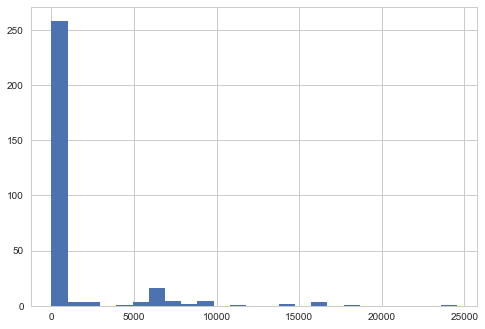

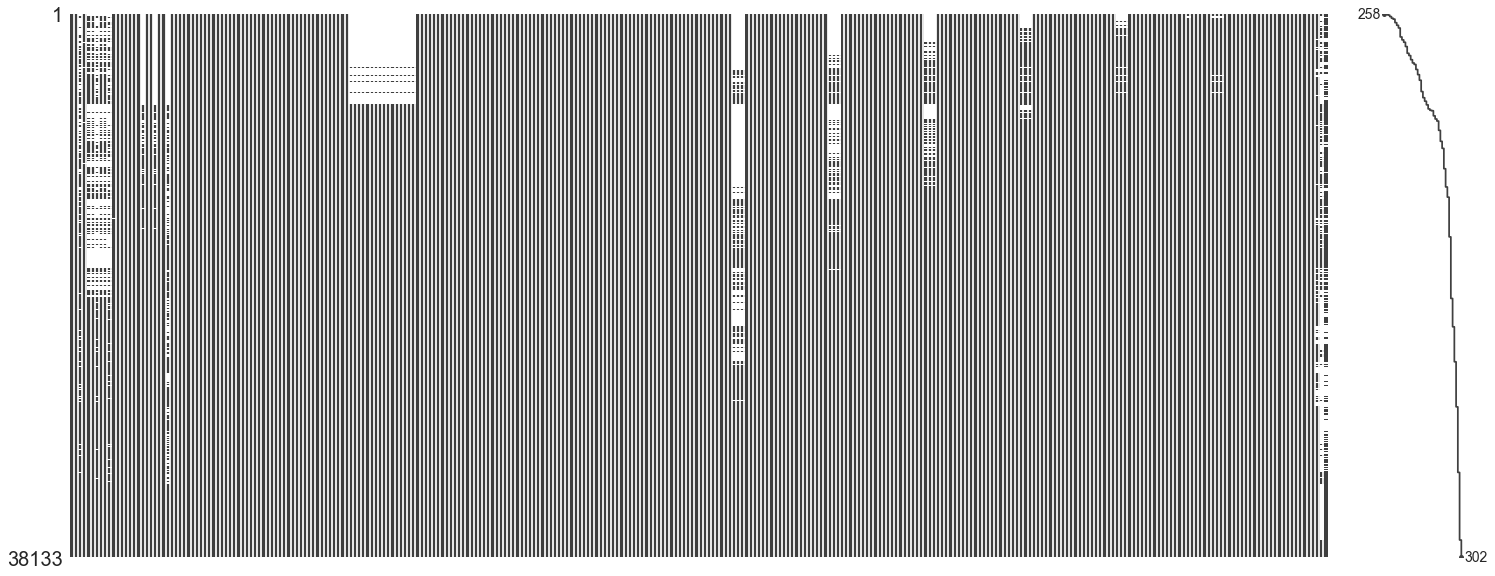

In [8]:
null_values = pd.DataFrame(sorted(df_complete.isnull().sum()))
plt.hist(null_values, bins=25);

no_features = df_complete.shape[1]
no_missing = df_complete.shape[1] - df_complete.dropna(axis=1).shape[1]

print("From {} features, {} having missing values. Thats {}% of them.".format(
        no_features, no_missing, round(no_missing/no_features*100),2))

msn.matrix(df_complete, sort="ascending")

<p>Looking at the histogram we can see that there are some features with show very high missing value counts. We should investigate this more.</p>
<p>We can look how much percent of the values are actually missing and what features are those.</p>

In [9]:
total = df_complete.isnull().sum().sort_values(ascending=False)
perc = (df_complete.isnull().sum()/df_complete.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, perc], axis=1, keys=['Total Missing', 'Percent'])
#print(missing_data["Percent"][missing_data["Percent"]>0][:25])
#plt.hist(missing_data["Percent"][missing_data["Percent"]>0], bins=25);
"""
#grouping features based on missing values
mt50 = missing_data["Percent"][missing_data["Percent"]>0.5]
mt25 = missing_data["Percent"][(missing_data["Percent"]>0.25) & (missing_data["Percent"]<0.5)]
mt10 = missing_data["Percent"][(missing_data["Percent"]>0.1) & (missing_data["Percent"]<0.25)]
mt5 = missing_data["Percent"][(missing_data["Percent"]>0.05) & (missing_data["Percent"]<0.1)]
lt5 = missing_data["Percent"][missing_data["Percent"]<0.05] 

print("Features with more than 50% missing values: {}".format(len(mt50)))
print("Those are: ")
for i,ind in enumerate(mt50.index):
    print("{} with {}% missing.".format(ind, round(mt50[i]*100,2)))
print("\n")
print("Features with more than 25% missing values: {}".format(len(mt25)))
print("Those are: ")
for i,ind in enumerate(mt25.index):
    print("{} with {}% missing.".format(ind, round(mt25[i]*100,2)))
print("\n")
print("Features with more than 10% missing values: {}".format(len(mt10)))
for i,ind in enumerate(mt10.index):
    print("{} with {}% missing.".format(ind, round(mt10[i]*100,2)))
print("\n")
print("Features with more than 5% missing values: {}".format(len(mt5)))
print("Features with less than 5% missing values: {}".format(len(lt5)))
""";

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


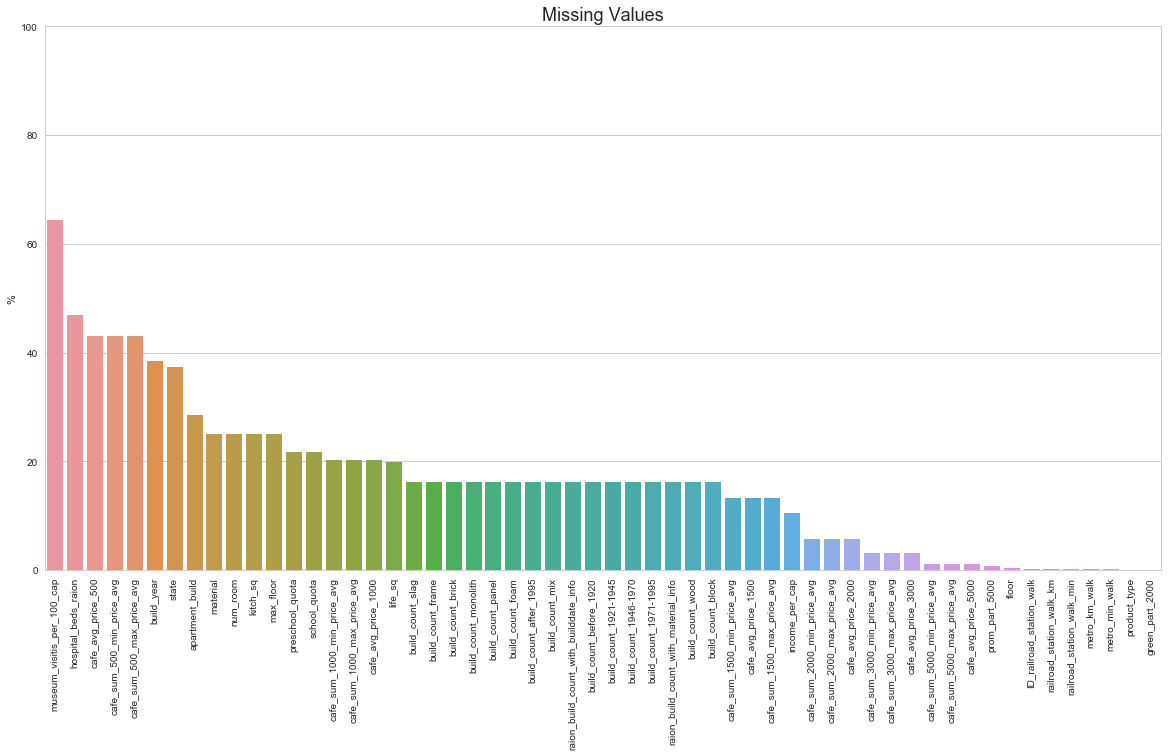

In [10]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='90')
sns.barplot(x=perc[perc > 0].index, y=perc[perc > 0]*100);
plt.title("Missing Values", fontsize=18)
plt.ylabel("%")
plt.ylim(0,100);

<p>Ok, lets quickly look at the test.csv and if more or less the same features show high missing value counts</p>

<p>So there are some features with a lot of missing values, which are probably important for the house price.</p>
<p>When we look at the features we have basically 3 types of features:</p>
<ul>
    <li><p>Features of the house itself (e.g. *num_room*).</P></li>
    <li><p>Features of the neighbourhood (e.g. *oil_chemistry_*).</P></li>
    <li><p>Features of Russia's economy (e.g. *gdp_annual*).</P></li>
</ul>
<p>Features of the house itself are probably most important for price predictions, therefore I will carefully look at those. Those features are:</p>
<ul>
    <li><p>**price_doc**: This is our target variable, the housing price in rubel.</P></li>
    <li><p>**id**: This is the id of the house. This is not important and we can drop it.</P></li>
    <li><p>**full_sq**: This are the total m² of the house.</P></li>
    <li><p>**life_sq**: This are the living room m².</P></li>
    <li><p>**floor**: This is only for apartments and shows the floor on which the apartment is.</P></li>
    <li><p>**max_floor**: The max floor of the building the apartment is in.</P></li>
    <li><p>**material**: The material of the walls:
    <ol>
        <li><p>panel</p></li>
        <li><p>brick</p></li>
        <li><p>wood</p></li>
        <li><p>mass concrete</p></li>
        <li><p>breezeblock</p></li>
        <li><p>mass concrete plus brick</p></li>
    </ol><p></p>
    <li><p>**build_year**: The year in which the house was (will be) build. (*This can also be in the future*)</P></li>
    <li><p>**kitch_sq**: This are the kitchen m².</P></li>
    <li><p>**num_room**: number of living rooms</P></li>
    <li><p>**state**: The state in which the house is (4 best, 1 worst).</P></li>
    <li><p>**product_type**: owner-occupier purchase or investment.</P></li>
    <li><p>**sub_area**: name of the district.</P></li>
</ul>
<p>Let's have a closer look at those. So we have continous numeric features:</p>
<ul><li><p>price_doc, full_sq, life_sq, kitch_sq</p></li></ul>
<p>some discrete numeric features:</p>
<ul><li><p>floor, max_floor, build_year, num_room</p></li></ul>
<p>and some categorical</p>
<ul><li><p>material, product_type, sub_area and state</p></li></ul>

<p>Lets explore them</p>

### Continous Feature Cleaning

In [11]:
cont = ["full_sq", "life_sq","kitch_sq"]
disc = ["floor", "max_floor", "build_year", "num_room"]
cat = ["material", "state", "product_type"]

,full_sq,life_sq,kitch_sq
count,38133.000000,30574.000000,28561.000000
mean,54.111172,34.033460,6.543995
std,35.171162,47.581529,27.571630
min,0.000000,0.000000,0.000000
25%,38.900000,20.000000,1.000000
50%,50.000000,30.000000,6.000000
75%,63.000000,43.000000,9.000000
max,5326.000000,7478.000000,2014.000000


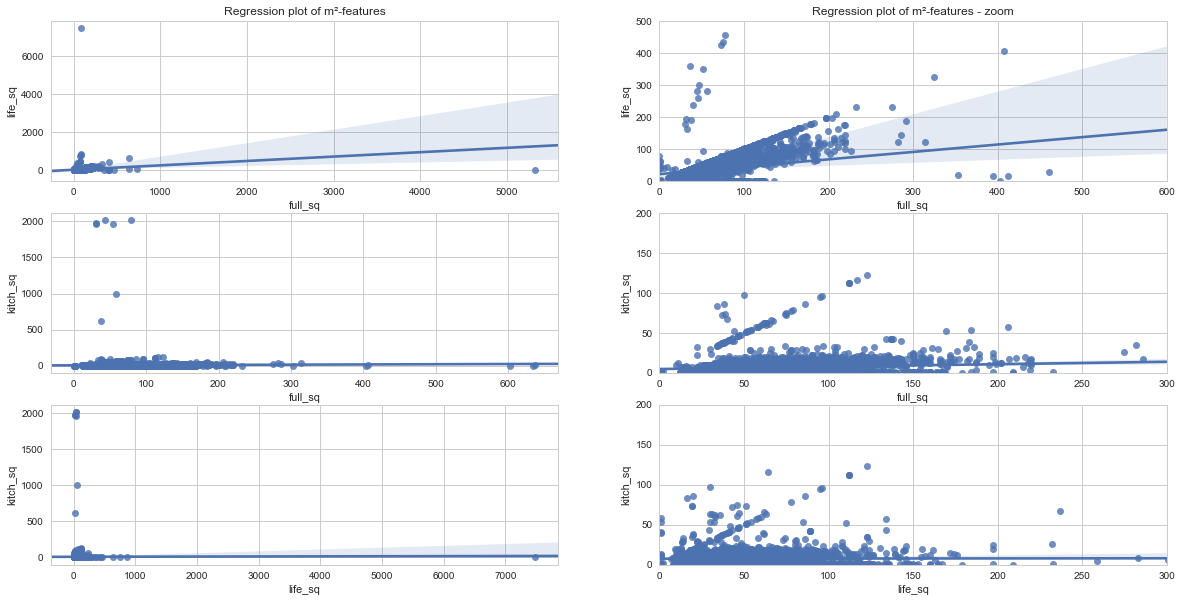

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(321)
plt.title("Regression plot of m²-features")
sns.regplot(df_complete["full_sq"], df_complete["life_sq"])
plt.subplot(322)
plt.title("Regression plot of m²-features - zoom")
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(df_complete["full_sq"], df_complete["life_sq"])
plt.subplot(323)
sns.regplot(df_complete["full_sq"], df_complete["kitch_sq"])
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(df_complete["full_sq"], df_complete["kitch_sq"])
plt.subplot(325)
sns.regplot(df_complete["life_sq"], df_complete["kitch_sq"])
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,200)
sns.regplot(df_complete["life_sq"], df_complete["kitch_sq"])

display(df_complete[cont].describe());

<p>A quick plot reveals some severe outliers, which we would like to reove.</p>
<p>When we look at the plots we can observe the following:</p>
<ol>
    <li><p>For some values ***life_sq > full_sq***.</p></li>
    <li><p>For some values ***kitch_sq > full_sq***.</p></li>
    <li><p>All three features show some outliers.</p></li>
    <li><p>The ratio of ***full_sq : life_sq*** seems to be terribly off for some cases.</p></li>
</ol>
<p>When we look at the features full_sq, life_sq and kitch_sq we can set up following rules: </p>
<ol>
    <li><p>full_sq >= life_sq > kitch_sq</p></li>
    <li><p>full_sq > 5 & life_sq > 5</p></li>
    <li><p>full_sq < 500</p></li>
    <li><p>life_sq < 500</p></li>
    <li><p>(kitch_sq >= 1 & full_sq < 15) or kitch_sq > 1</p></li>
    <li><p>life_sq/full_sq < 0.4</p></li>
</ol>
<p>I chose a cutoff of 5 m² since there are micro appartments with comparable sizes.</p>
<p>We will look at violation in detail and decide what to do.</p>


In [13]:
for i in range(len(df_complete)):
    if df_complete.loc[i, "full_sq"] < 5 or df_complete.loc[i, "full_sq"] > 300:
        df_complete.loc[i, "full_sq"] = np.NaN
    if df_complete.loc[i, "life_sq"] > df_complete.loc[i, "full_sq"] or df_complete.loc[i, "life_sq"] < 5 or\
    df_complete.loc[i, "life_sq"] > 300:
        df_complete.loc[i, "life_sq"] = np.NaN
    if df_complete.loc[i, "kitch_sq"] >= df_complete.loc[i, "full_sq"] or\
    df_complete.loc[i, "kitch_sq"] >= df_complete.loc[i, "life_sq"] and df_complete.loc[i, "life_sq"] > 5 or\
    df_complete.loc[i, "kitch_sq"] <= 1 and df_complete.loc[i, "full_sq"] <= 15 or\
    df_complete.loc[i, "kitch_sq"] < 2:
        df_complete.loc[i, "kitch_sq"] = np.NaN
    if df_complete.loc[i, "full_sq"] > 0 and df_complete.loc[i, "life_sq"] > 0:
        if df_complete.loc[i, "life_sq"]/df_complete.loc[i, "full_sq"] < 0.4:
            df_complete.loc[i, "life_sq"] = np.NaN

<p>Ok so this should do it for the continous numeric features. However, before we move on lets visualize these again in order to see if the plots are looking better.</p>

,full_sq,life_sq,kitch_sq
count,38088.000000,29357.000000,20078.000000
mean,53.850841,34.602912,8.162696
std,20.791096,17.849044,2.748633
min,5.000000,8.000000,2.000000
25%,38.900000,20.000000,6.000000
50%,50.000000,30.000000,8.000000
75%,63.000000,43.000000,10.000000
max,291.000000,232.700000,57.000000


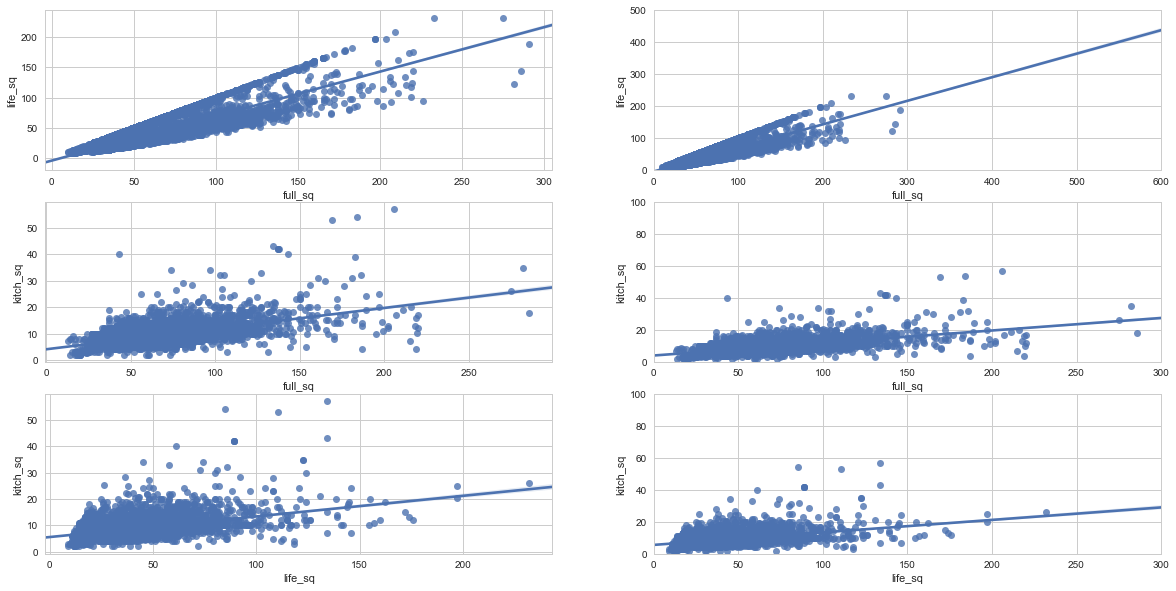

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.regplot(df_complete["full_sq"], df_complete["life_sq"]);
plt.subplot(322)
plt.xlim(0,600)
plt.ylim(0,500)
sns.regplot(df_complete["full_sq"], df_complete["life_sq"]);
plt.subplot(323)
sns.regplot(df_complete["full_sq"], df_complete["kitch_sq"]);
plt.subplot(324)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(df_complete["full_sq"], df_complete["kitch_sq"]);
plt.subplot(325)
sns.regplot(df_complete["life_sq"], df_complete["kitch_sq"]);
plt.subplot(326)
plt.xlim(0,300)
plt.ylim(0,100)
sns.regplot(df_complete["life_sq"], df_complete["kitch_sq"]);

display(df_complete[cont].describe());

### Discrete Feature Cleaning
<p>So after we dealt with the continous numeric features lets have a look at the discrete features.n Again lets start with some basic exploration and visualization.</p>

In [15]:
df_complete[disc].describe()

,floor,max_floor,build_year,num_room
count,37966.000000,28561.000000,2.347900e+04,28561.000000
mean,7.667123,12.567592,2.716785e+03,1.900844
std,5.276156,6.730496,1.308521e+05,0.847620
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,9.000000,1.966000e+03,1.000000
50%,7.000000,12.000000,1.980000e+03,2.000000
75%,11.000000,17.000000,2.006000e+03,2.000000
max,77.000000,117.000000,2.005201e+07,19.000000


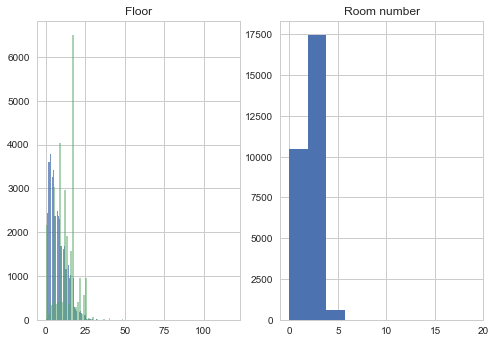

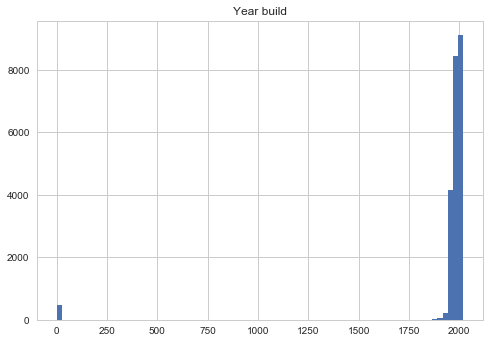

In [16]:
plt.figure()
plt.subplot(121)
plt.title("Floor")
plt.hist(df_complete["floor"].dropna(), bins=100, alpha = 0.75);
plt.hist(df_complete["max_floor"].dropna(), bins=100, alpha = 0.5);
plt.subplot(122)
plt.title("Room number")
plt.hist(df_complete["num_room"].dropna(), bins=10);
plt.figure()
plt.title("Year build")
plt.hist(sorted(df_complete["build_year"].dropna())[1000:-50], bins=80);

### Cleaning the discrete values
<p>Ok so there are some things to do:</p>
<ul><li><p>**Floors**</p>
        <ol>
            <li><p>The Oko1 tower is Moscow's highest skyscraper with 85 floors.
            This is the max value for floor and max_floor.</p></li>
            <li><p>The floor must not be larger than the max_floor value.</p>
            *After lookig at the values in detail it seems not likely that values were just swapped.*</li>
        </ol>
    </li><p></p>
    <li><p>**num_room**</p>
        <ol>
            <li><p>The room number should be larger than 0.</p></li>
            <li><p>We can also compare the room_num with life_sq. The average room size shouldn't be smaller than 4 m².</p></li>
        </ol>
    </li><p></p>
    <li><p>**build_year**</p>
        <ol>
            <li><p>There are two outlier which will be manually corrected.</p></li>
            <li><p>Values smaller than 1900 will be replaced with NaN.</p></li>
        </ol>
    </li>
</ul>

In [17]:
print(df_complete.loc[10089, "build_year"])
print(df_complete.loc[15220, "build_year"])
df_complete.loc[10089, "build_year"] = 2007
df_complete.loc[15220, "build_year"] = 1965

for i in range(len(df_complete)):
    if df_complete.loc[i, "floor"] > 85:
        df_complete.loc[i, "floor"] = np.NaN
    if df_complete.loc[i, "max_floor"] > 85:
        df_complete.loc[i, "max_floor"] = np.NaN
    if df_complete.loc[i, "max_floor"] < df_complete.loc[i, "floor"]:
        df_complete.loc[i, "max_floor"] = np.NaN
    
    if df_complete.loc[i, "build_year"] < 1500:
        df_complete.loc[i, "build_year"] = np.NaN
    if df_complete.loc[i, "build_year"] > 2020:
        df_complete.loc[i, "build_year"] =np.NaN
        
    if df_complete.loc[i, "num_room"] == 0:
        df_complete.loc[i, "num_room"] = np.NaN
    if df_complete.loc[i, "life_sq"] > 0 and df_complete.loc[i, "num_room"] > 0:    
        if df_complete.loc[i, "life_sq"]/df_complete.loc[i, "num_room"] < 4:
            df_complete.loc[i, "num_room"] = np.NaN

20052009.0
4965.0


,floor,max_floor,build_year,num_room
count,37966.000000,26421.000000,22018.000000,28541.000000
mean,7.667123,13.499716,1986.252066,1.899338
std,5.276156,5.962326,21.297968,0.826756
min,0.000000,0.000000,1691.000000,1.000000
25%,3.000000,9.000000,1969.000000,1.000000
50%,7.000000,14.000000,1983.000000,2.000000
75%,11.000000,17.000000,2008.000000,2.000000
max,77.000000,57.000000,2019.000000,9.000000


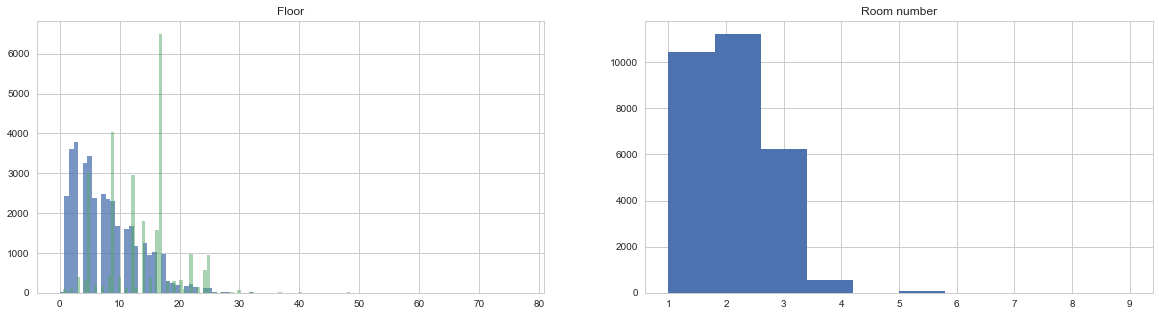

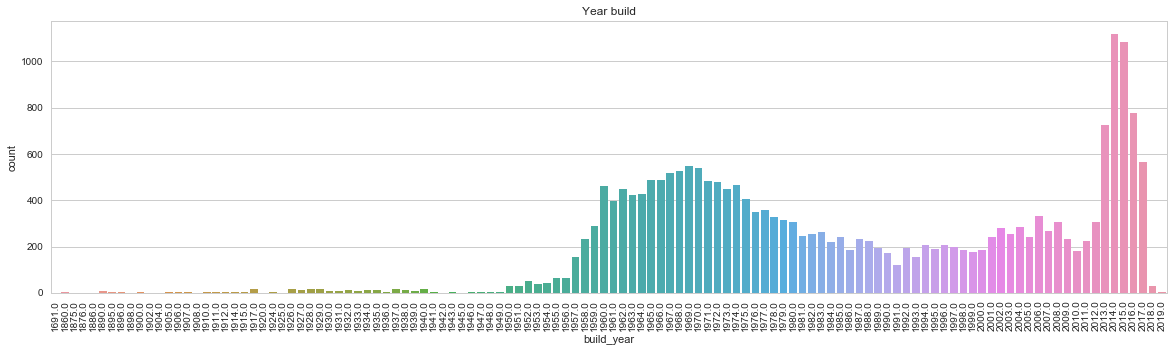

In [18]:
display(df_complete[disc].describe())

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title("Floor")
plt.hist(df_complete["floor"].dropna(), bins=100, alpha = 0.75);
plt.hist(df_complete["max_floor"].dropna(), bins=100, alpha = 0.5);
plt.subplot(122)
plt.title("Room number")
plt.hist(df_complete["num_room"].dropna(), bins=10);
plt.figure(figsize=(20,5))
plt.title("Year build")
plt.xlim(1900,2020)
plt.xticks(rotation=90)
sns.countplot(df_complete["build_year"])

## Let's add relative floor and average room size as features

In [19]:
df_complete["rel_floor"] = df_complete["floor"] / df_complete["max_floor"].astype(float)
df_complete["avrg_room"] = df_complete["life_sq"] / df_complete["num_room"].astype(float)

 ### Categorical Feature Cleaning
 <p>So we have 4 categorical features that might need some cleaning. We know that there are 6 material types, 4 state types and 2 product types.</p>

In [20]:
for i in cat:
    display(df_complete[i].value_counts())

1.0    19438
2.0     3951
5.0     2048
4.0     1963
6.0     1159
3.0        2
Name: material, dtype: int64

2.0     8506
3.0     7703
1.0     7121
4.0      549
33.0       1
Name: state, dtype: int64

Investment       24446
OwnerOccupier    13654
Name: product_type, dtype: int64

In [21]:
x = (df_complete["state"][df_complete["state"] == 33].index[0])
df_complete.loc[x, ["state"]] = 3

# Lets change the timestamp into year month and day ow week and drop timestamp

In [22]:
df_complete['year'] = df_complete.timestamp.dt.year
df_complete['month'] = df_complete.timestamp.dt.month
df_complete['dow'] = df_complete.timestamp.dt.dayofweek
df_complete.drop(['timestamp'], axis=1, inplace=True)

#### short summary:
#### We merged the train, test and macro df into one big dataframe and afterwards we looked at missing values and looked data inconsitencies for important features in detail. Next steps will be to facorize categorical features. 
#### Afterwards in one approach I will try a PCA analysis. Therefore the missing values of the data have to be imputed and the data has to be scaled and normalized. 
#### Then the different models will be trained on the different dataframes using crossvalidation. Here I will have to think of a good pipeline implementation to come up with. Further the data has to be in good shape since this will indeed be a rather time consuming step. 

In [23]:
df_complete_num = df_complete.select_dtypes(exclude = ["object"])
df_complete_obj = df_complete.select_dtypes(include = ["object"]).copy()
df_complete_obj.fillna("NaN", inplace=True)
enc = LabelEncoder()
for obj in df_complete_obj:
        df_complete_obj[obj] = enc.fit_transform(df_complete_obj[obj])

In [25]:
df_complete_encoded = pd.concat([df_complete_num, df_complete_obj], axis=1)
pos = len(train_df)
df_no_macro = df_complete_encoded.drop(macro_df.columns[1:], axis=1)
df_train1 = df_no_macro[:pos]
df_test1 = df_no_macro[pos:]

df_train2 = df_complete_encoded[:pos]
df_test2 = df_complete_encoded[pos:]

#### Ok so at this point we have a df_train a df_test and y_log, this dfs can be used to train boosting algos which are insentive to missing values and do not rely on scaled or normalized data. I will try to run a xgboost a light general boost and a random forest ensemble on this datasets. 
#### I also will impute missing values, scale and normlize the data and perfom pca. Afterwards I will run besides the upper algos additionaly a ridge and lasso regression on the dfs.
#### The best performing untuned model will then be subjected to hyperparameter tuning

# Some exploration of the cleaned data

### Correlation matrix 

In [26]:
#cor = test_df.select_dtypes(exclude = ["object"]).corr()

In [27]:
#plt.figure(figsize=(20,20))
#sns.clustermap(cor, square=True, linewidth=1, annot= False, cmap=cmap);
#sns.heatmap(cor)
#plt.xticks(rotation=45);
#plt.yticks(rotation=0);

#cholesky = np.linalg.cholesky(cor)
#for i in cholesky:
#    print(i)

### Categorical features
<p>***Material***</p>
<p>When we look at the categorical features we can see that the material does not show to high correlation with the target variable. Maybe material 2 shows slightly higher, while material 5 slightly lower prices.<p> 
<p>***State***</p>
<p>when we look at the state we can see a increase of the target variable with higher state.</p>
<p>***Product type***</p>
<p>Product types does not have too much of an influence on the price</p>

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


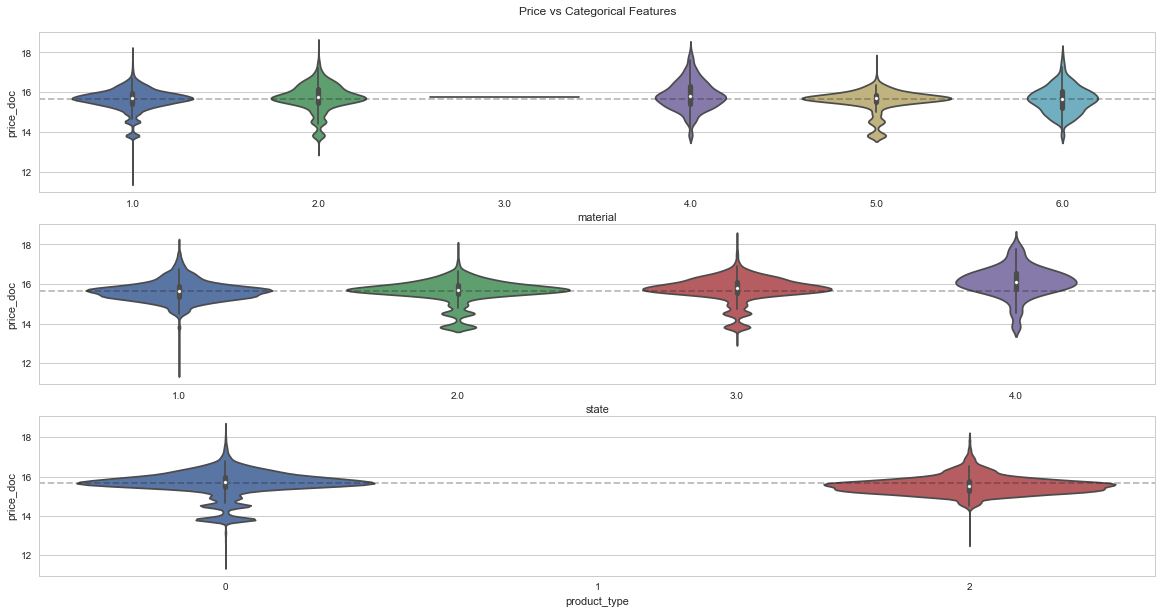

In [28]:
plt.figure(figsize=(20,10))
ax = plt.subplot(311)
plt.title("Price vs Categorical Features\n")
sns.violinplot(x="material", y=y_log, data=df_complete_encoded)
ax.hlines(np.median(y_log),-1,6, linestyle='--', alpha=0.3)
ax = plt.subplot(312)
sns.violinplot(x="state", y=y_log, data=df_complete_encoded)
ax.hlines(np.median(y_log),-1,6, linestyle='--', alpha=0.3)
ax = plt.subplot(313)
sns.violinplot(x="product_type", y=y_log, data=df_complete_encoded)
ax.hlines(np.median(y_log),-1,6, linestyle='--', alpha=0.3)

# Continous variables
<p>There are some obvious correlations between those. Lets look at them some more and maybe group them in a new variable, in order to reduce dimensionality.</p>

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


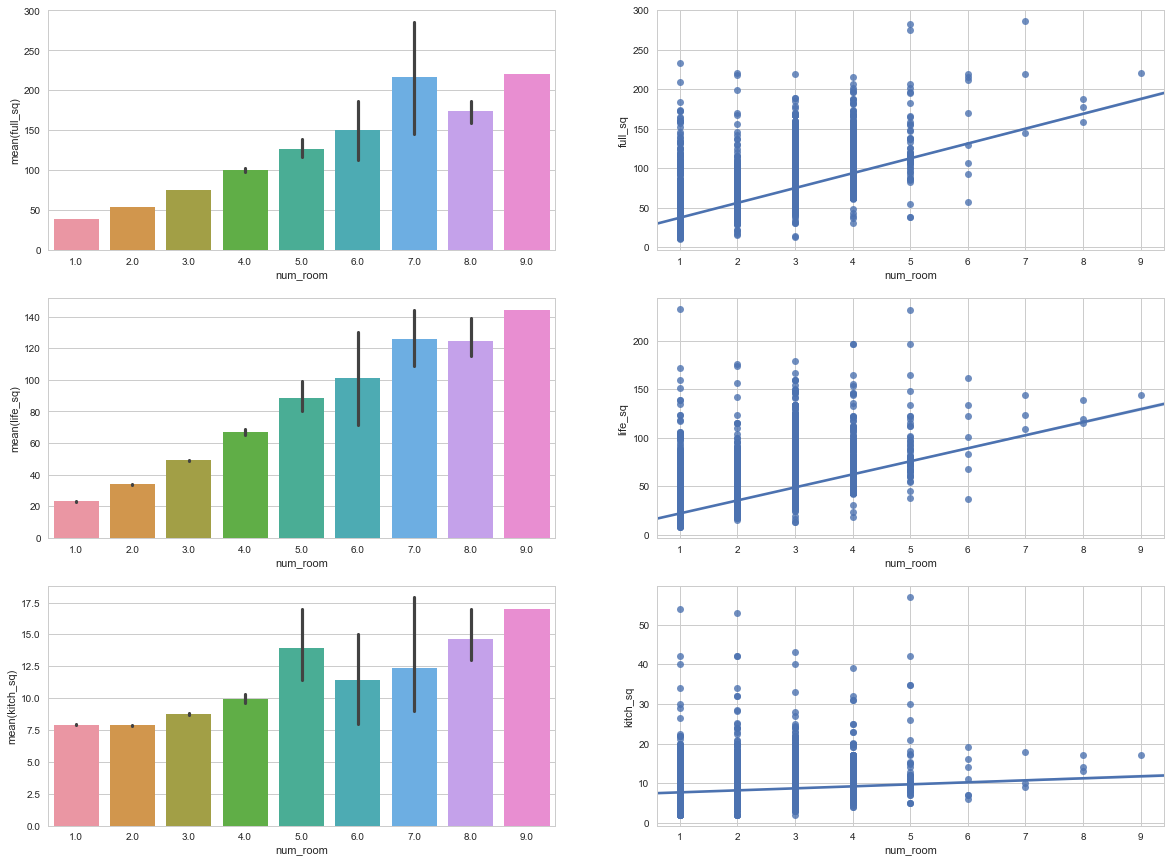

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(321)
sns.barplot("num_room", "full_sq", data=df_complete_encoded)
plt.subplot(322)
sns.regplot("num_room", "full_sq", data=df_complete_encoded)
plt.subplot(323)
sns.barplot("num_room", "life_sq", data=df_complete_encoded)
plt.subplot(324)
sns.regplot("num_room", "life_sq", data=df_complete_encoded)
plt.subplot(325)
sns.barplot("num_room", "kitch_sq", data=df_complete_encoded)
plt.subplot(326)
sns.regplot("num_room", "kitch_sq", data=df_complete_encoded)

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


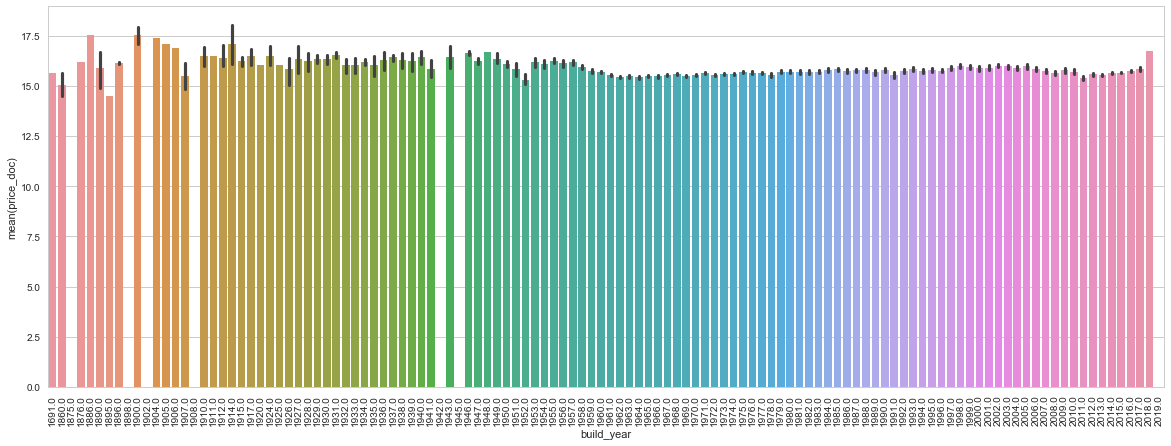

In [30]:
plt.figure(figsize=(20,7))
sns.barplot("build_year", y_log, data=df_complete_encoded);
plt.xticks(rotation=90);

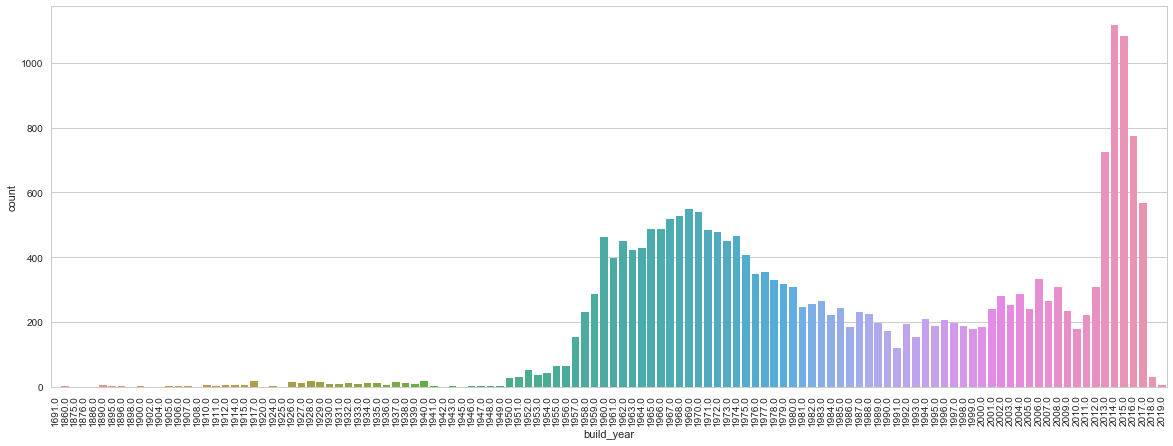

In [31]:
plt.figure(figsize=(20,7))
sns.countplot("build_year", data=df_complete_encoded);
plt.xticks(rotation=90);

(1850, 2025)

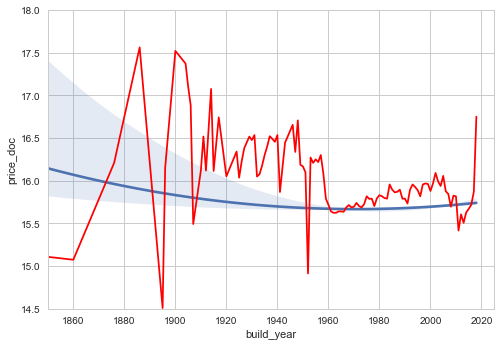

In [32]:
x = pd.concat([df_train1["build_year"], y_log], axis=1)
aver = x.groupby("build_year")[["build_year", "price_doc"]].median()
#recent = df_complete_encoded[["build_year", "price_doc"]][df_complete_encoded["build_year"] > 1850]
sns.regplot("build_year", y_log, data=df_train1, scatter=False, order=2,truncate=True)
plt.plot(aver["build_year"], aver["price_doc"], color ="red")
plt.ylim(14.5,18)
plt.xlim(1850,2025)

# Ok so lets save the encoded features for later until we have dealt with the numeric ones

# Feature Reduction 

## I will try to reduce the dimensionality of this data  via PCA

## Principal Component Analysis

### Ok so now lets attempt to reduce the dimensionality of the remaining features by applying a PCA.
### For the PCA to yield reliable results we have to do some data transformation first.

<ol>
    <li><p>Pick all numeric features.</p></li>
    <li><p>Drop features with too many missing values.</p></li>
    <li><p>Scale data -> minMaxScaler.</p></li>
    <li><p>Remove outlier.</p></li>
    <li><p>PCA</p></li>
</ol>

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


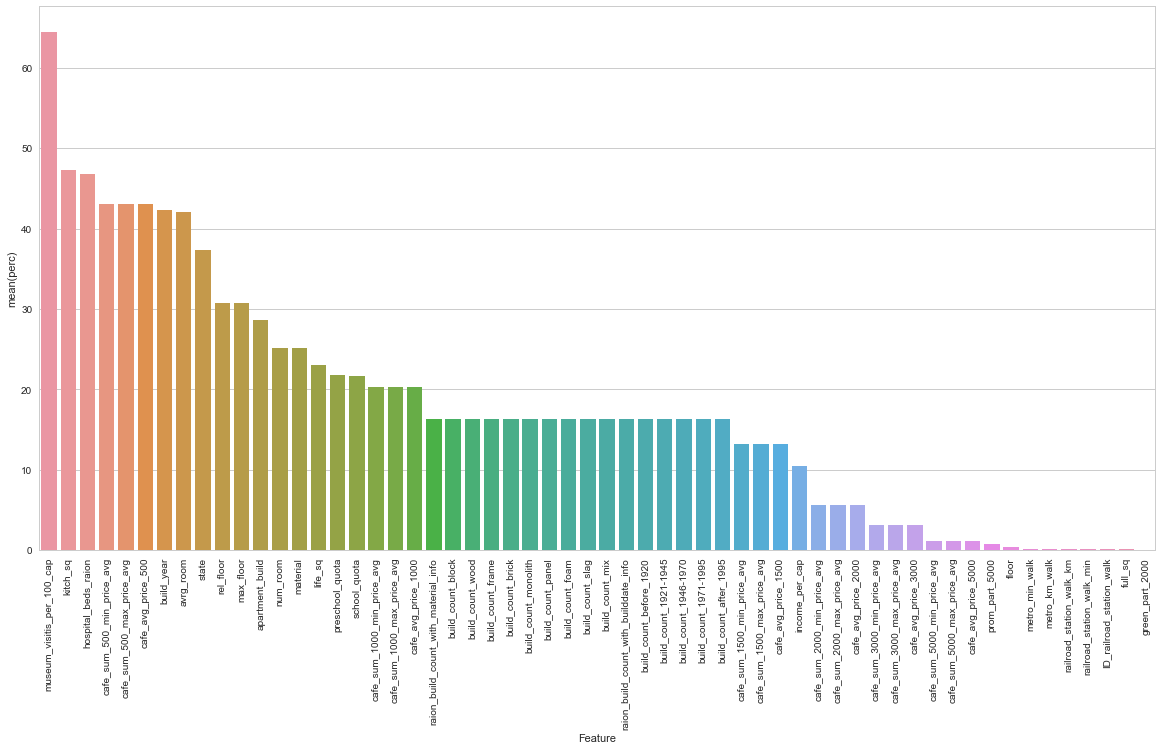

In [33]:
m = df_complete_encoded.isnull().sum()

missing = zip(df_complete_encoded.columns, m)
missing = sorted(missing, key = lambda x: x[1], reverse=True)
missing = pd.DataFrame(missing)
missing.columns = ["Feature", "Missing"]
missing = missing[missing["Missing"] > 0]
missing["perc"] = missing["Missing"]/len(df_complete_encoded)*100

plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.barplot(missing["Feature"], missing["perc"])

<p>Gonna drop features which show too much missing values. I will choose >20% missing as cutoff. The other features
are going to be imputed. I will first try a simple median impuation. I will drop features in both datasets.</p>

In [34]:
missing = missing[missing["perc"] > 5]
df_complete_imputation = df_complete_encoded.drop(missing["Feature"], axis=1, inplace = False)

In [35]:
df_complete_imputation.fillna(df_complete_imputation.median(), inplace=True);

In [36]:
#scale data
#scale data
from sklearn.preprocessing import MinMaxScaler, normalize
scaler = MinMaxScaler()
cols = df_complete_imputation.columns
df_complete_imputation = scaler.fit_transform(df_complete_imputation)
df_complete_imputation = normalize(df_complete_imputation)
df_complete_imputation = pd.DataFrame(df_complete_imputation)
df_complete_imputation.columns = cols

# Check for outlier via IsolationForest 

In [37]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest()
x = iso.fit(df_complete_imputation)
pred = x.predict(df_complete_imputation)

In [39]:
unique, counts = numpy.unique(pred, return_counts=True)
res = dict(zip(unique, counts))

print(res)

{1: 34319, -1: 3814}


In [40]:
a = [0 for i in range(len(train_df))]
b = [1 for i in range(len(test_df))]
c = a+b
c = pd.Series(c)

df_complete_imputation["DATA"] = c

In [42]:
pred_bools = pd.DataFrame(pred, columns=["outlier"])
pred_bools

df_complete_imputation_temp  = pd.concat([df_complete_imputation, pred_bools], axis=1)
df_complete_imputation_train = df_complete_imputation[df_complete_imputation_temp["DATA"] == 0]
df_complete_imputation_test = df_complete_imputation[df_complete_imputation_temp["DATA"] == 1]
df_complete_imputation_train = df_complete_imputation_train[df_complete_imputation_temp["outlier"] == 1]
df_complete_imputation = pd.concat([df_complete_imputation_train, df_complete_imputation_test])

y_bools = pred_bools.iloc[:len(train_df),:]
y_log_imputation = pd.concat([y_log, y_bools], axis=1)
y_log_imputation = y_log_imputation[y_log_imputation["outlier"] == 1]
y_log_imputation.drop("outlier", axis=1, inplace=True)
y_log_imputation = y_log_imputation.values
y_log_imputation = pd.Series(y_log_imputation[:,0])

C:\Users\Wegee\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [44]:
DATA = df_complete_imputation["DATA"]
df_complete_imputation.drop("DATA", axis=1, inplace=True)

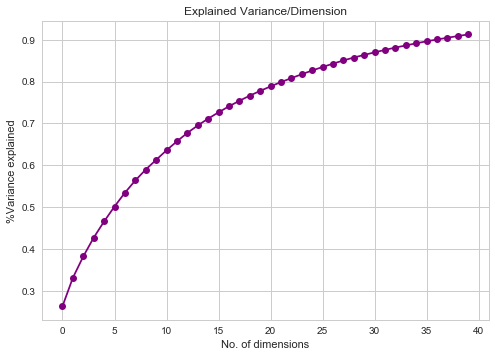

In [45]:
pca = PCA(n_components = 40)
pca = pca.fit(df_complete_imputation)
explained = pca.explained_variance_ratio_
plt.figure()
plt.plot(range(40), np.cumsum(explained), 'o-', color='purple')
plt.title("Explained Variance/Dimension")
plt.xlabel("No. of dimensions")
plt.ylabel("%Variance explained")

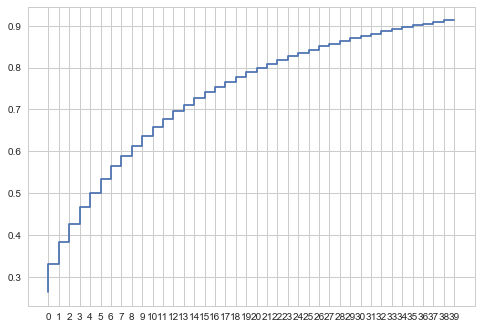

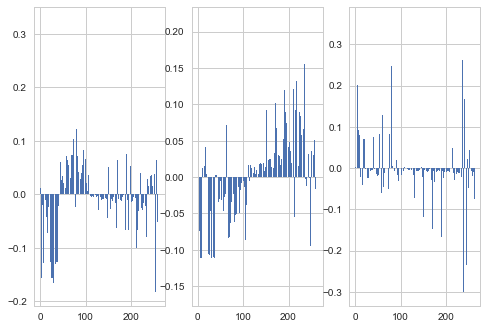

In [46]:
import heapq
plt.figure()
plt.step(range(40), np.cumsum(explained))
plt.xticks(range(40));
dimensions = pca.components_[:3]
plt.figure()
ind = []
for i, dim in enumerate(dimensions):
    plt.subplot(1,3,i+1)
    plt.bar(range(len(df_complete_imputation.columns)), dim)
    ind.append(np.argpartition(dim, -15)[-15:])

In [47]:
for i in ind:
    print(df_complete_imputation.columns[i])

Index(['kremlin_km', 'zd_vokzaly_avto_km', 'sadovoe_km', 'ttk_km',
       'bulvar_ring_km', 'railroad_station_avto_km', 'green_part_3000',
       'ID_railroad_station_avto', 'oil_chemistry_km', 'sub_area',
       'ID_bus_terminal', 'detention_facility_km', 'green_zone_part',
       'ID_big_road1', 'product_type'],
      dtype='object')
Index(['prom_part_2000', 'office_sqm_5000', 'ID_railroad_terminal',
       'market_count_3000', 'sport_count_3000', 'trc_count_5000',
       'indust_part', 'prom_part_3000', 'trc_sqm_5000', 'ecology',
       'radiation_raion', 'prom_part_5000', 'sport_count_5000',
       'mosque_count_5000', 'market_count_5000'],
      dtype='object')
Index(['green_zone_km', 'product_type', 'preschool_education_centers_raion',
       'month', 'prom_part_1000', 'incineration_raion',
       'ID_railroad_station_walk', 'ID_railroad_station_avto', 'balance_trade',
       'prom_part_2000', 'micex_rgbi_tr', 'prom_part_3000', 'indust_part',
       'ID_bus_terminal', 'prom_part_

In [48]:
df_pca = pca.transform(df_complete_imputation)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ["PC" + str(i+1) for i in range(len(df_pca.columns))]

# For partial PCA we will first determine the 10 most important features. Those will be excluded in PCA

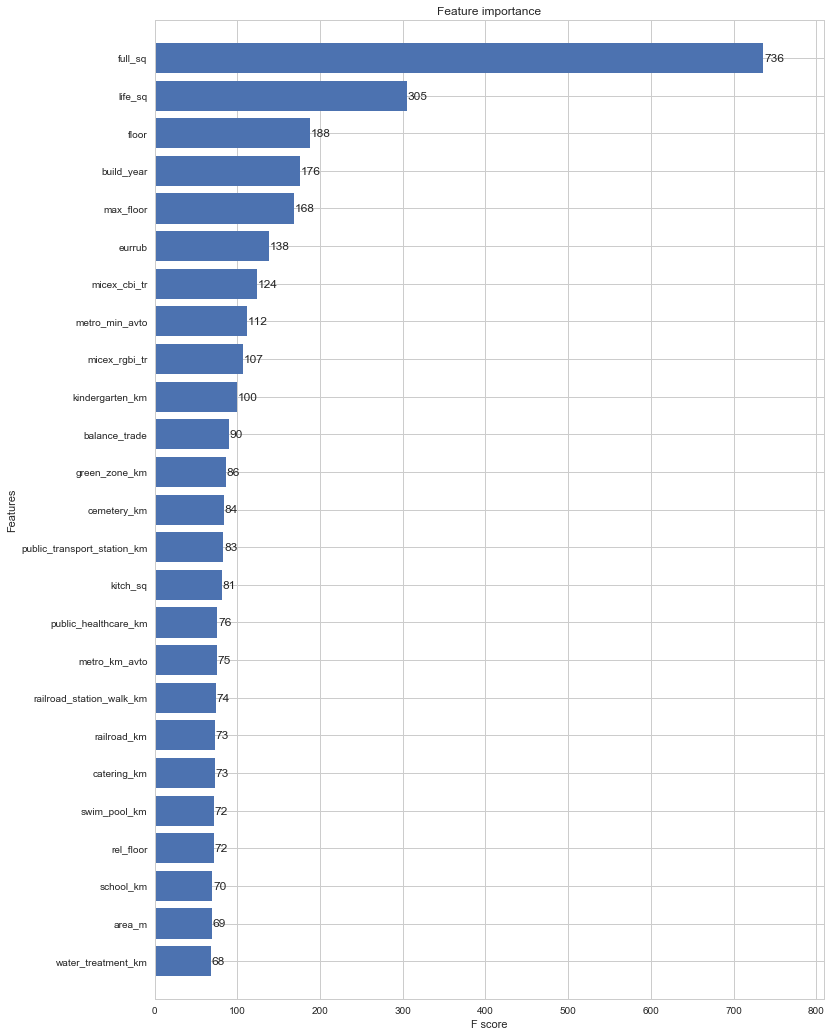

In [49]:
y = y_log
X = df_train2
#X = X[X.columns[X.dtypes!="object"]]

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(X, y, feature_names=X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

#plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=25, height=0.8, ax=ax)
plt.show()

In [50]:
import operator
x = model.get_score(importance_type='weight')
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
imp_features = [i[0] for i in sorted_x[:10]]

In [51]:
df_ppca_main = df_complete_encoded[imp_features]

#pred_bools = pd.DataFrame(pred, columns=["outlier"])
#df_ppca_main  = pd.concat([df_ppca_main, pred_bools], axis=1)
#df_ppca_main = df_ppca_main[df_ppca_main["outlier"] == 1]
#df_ppca_main.drop("outlier", axis=1, inplace=True)

df_ppca_side = df_complete_imputation.copy()
for feature in df_ppca_main.columns:
    try:
        df_ppca_side.drop(feature, axis=1, inplace=True)
    except:
        print("{} has already been dropped.".format(feature))

life_sq has already been dropped.
build_year has already been dropped.
max_floor has already been dropped.


In [52]:
ppca = PCA(n_components = 60)
ppca = ppca.fit(df_ppca_side)
explained = ppca.explained_variance_ratio_
cols = ["PC" + str(i+1) for i in range(60)]
features = df_ppca_side.columns
df_ppca_side = ppca.transform(df_ppca_side)
df_ppca_side = pd.DataFrame(df_ppca_side)
df_ppca_side.columns = cols

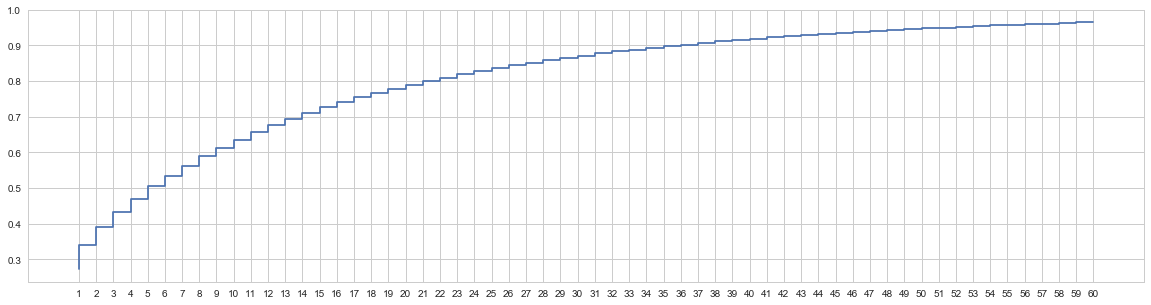

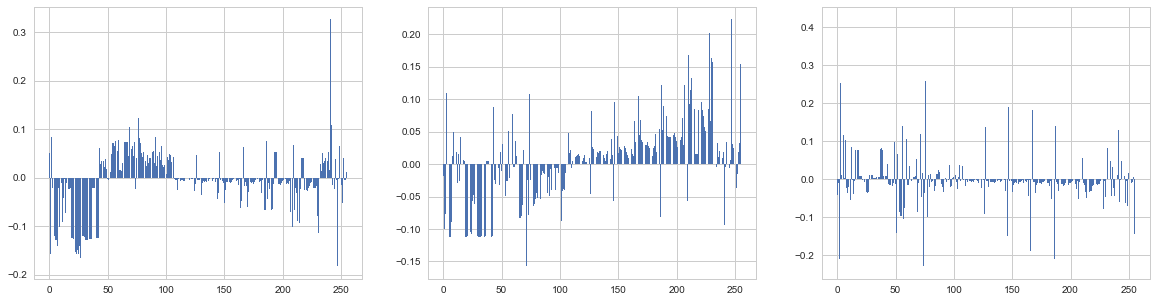

In [53]:
import heapq
plt.figure(figsize(20,5))
plt.step(range(1,61), np.cumsum(explained))
plt.xticks(range(1,61));
dimensions = ppca.components_[:3]
plt.figure(figsize(20,5))
ind = []
for i, dim in enumerate(dimensions):
    plt.subplot(1,3,i+1)
    plt.bar(range(len(dim)), dim)
    ind.append(np.argpartition(dim, -15)[-15:])

In [54]:
for i in ind:
    print(features[i])

Index(['kremlin_km', 'zd_vokzaly_avto_km', 'sadovoe_km', 'ttk_km',
       'bulvar_ring_km', 'railroad_station_avto_km', 'oil_chemistry_km',
       'sub_area', 'ID_bus_terminal', 'detention_facility_km',
       'green_part_3000', 'ID_railroad_station_avto', 'ID_big_road1',
       'green_zone_part', 'product_type'],
      dtype='object')
Index(['market_count_3000', 'prom_part_2000', 'ID_railroad_terminal',
       'office_sqm_5000', 'sport_count_3000', 'trc_count_5000', 'indust_part',
       'prom_part_3000', 'trc_sqm_5000', 'ecology', 'radiation_raion',
       'prom_part_5000', 'market_count_5000', 'mosque_count_5000',
       'sport_count_5000'],
      dtype='object')
Index(['additional_education_raion', 'green_zone_km',
       'school_education_centers_raion', 'ID_railroad_station_avto',
       'incineration_raion', 'ID_railroad_station_walk',
       'preschool_education_centers_raion', 'product_type', 'indust_part',
       'ID_big_road2', 'ID_bus_terminal', 'prom_part_1500', 'prom_part

In [55]:
df_ppca_main.reset_index(drop=True, inplace=True)
df_ppca_side.reset_index(drop=True, inplace=True)
df_ppca = pd.concat([df_ppca_main, df_ppca_side.iloc[:,:10]], axis = 1)

In [56]:
#concat with DATA frame for spliting into test and train

df_complete_imputation = pd.concat([df_complete_imputation, DATA], axis=1)
df_pca = pd.concat([df_pca, DATA], axis=1)
df_ppca = pd.concat([df_ppca, DATA], axis=1)

In [57]:
df_train3 = df_complete_imputation[df_complete_imputation["DATA"] == 0] 
df_test3 = df_complete_imputation[df_complete_imputation["DATA"] == 1] 
df_train3.drop("DATA", axis=1, inplace=True)
df_test3.drop("DATA", axis=1, inplace=True)

df_train4 = df_pca[df_pca["DATA"] == 0] 
df_test4 = df_pca[df_pca["DATA"] == 1] 
df_train4.drop("DATA", axis=1, inplace=True)
df_test4.drop("DATA", axis=1, inplace=True)

df_train5 = df_ppca[df_ppca["DATA"] == 0] 
df_test5 = df_ppca[df_ppca["DATA"] == 1] 
df_train5.drop("DATA", axis=1, inplace=True)
df_test5.drop("DATA", axis=1, inplace=True)


C:\Users\Wegee\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Wegee\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Wegee\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Wegee\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a 

### Before training the algorithm, quickly compare the training and testing data, to see if there are still major differences between those.

<Container object of 3 artists>

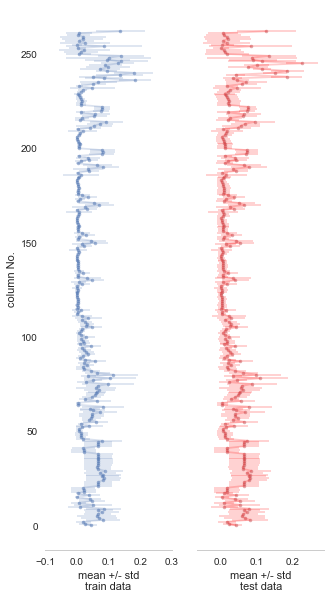

In [182]:
train_means = [np.mean(df_train3[i]) for i in df_train3.columns]
test_means = [np.mean(df_test3[i]) for i in df_test3.columns]
train_std = [np.std(df_train3[i]) for i in df_train3.columns]
test_std = [np.std(df_test3[i]) for i in df_test3.columns]

plt.figure(figsize(5,10))
ax = plt.subplot(121)
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylabel("column No.")
plt.xlabel("mean +/- std\ntrain data")
#plt.plot(train_means, range(263), ".b", alpha = 0.5)
plt.xlim(-0.1,0.3)
plt.plot(train_means, range(263), ".b", alpha=0.5)
plt.errorbar(train_means, range(263), xerr=train_std, alpha=0.2)
ax = plt.subplot(122)
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel("mean +/- std\ntest data")
ax.axes.get_yaxis().set_visible(False)
plt.plot(test_means, range(263), ".r", alpha=0.5)
plt.errorbar(test_means, range(263), xerr=test_std, color="red", alpha=0.2)

<Container object of 3 artists>

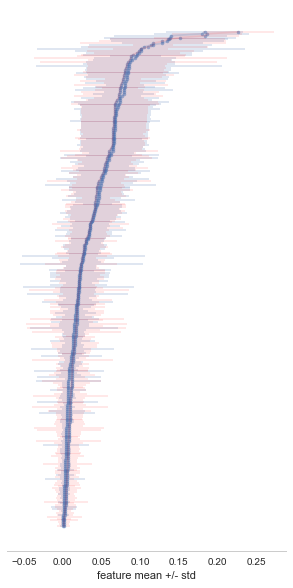

In [175]:
train = [[train_means[i], train_std[i]] for i in range(263)]
train = sorted(train)
test = [[test_means[i], test_std[i]] for i in range(263)]
test = sorted(test)

train_meansx = [i[0] for i in train]
train_stdx = [i[1] for i in train] 
test_meansx = [i[0] for i in test]
test_stdx = [i[1] for i in test] 

plt.figure()
ax = plt.subplot()
ax.axes.get_yaxis().set_visible(False)
plt.xlabel("feature mean +/- std")
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.plot(train_meansx, range(263), ".b", alpha=0.5)
plt.errorbar(train_meansx, range(263), xerr=train_stdx, alpha=0.2)
plt.plot(test_meansx, range(263), ".b", alpha=0.5)
plt.errorbar(test_meansx, range(263), xerr=test_stdx, alpha=0.1, color="red")

# At this point we've got the following datastructures:
<ol>
<li><p>**train_df**&emsp;&emsp;&emsp;	train dataframe w/o id, price_doc</p></li> 
<li><p>**test_df**	&emsp;&emsp;&emsp;			test dataframe w/o id</p></li>
<li><p>**y_log**	&emsp;&emsp;&emsp;			log1p of price_doc </p></li>
<p></p>
<li><p>**df_no_macro**	&emsp;&emsp;&emsp;		train and test w/o macro</p></li>
<li><p>**df_complete**	&emsp;&emsp;&emsp;	train, test and certain macro features</p></li>
<li><p>**df_complete_encoded**	&emsp;&emsp;&emsp;	train, test and certain macro features labelencoded</p></li>
<li><p>**df_complete_imputation**&emsp;&emsp;&emsp;		train,test and certain macro features w/ median impuation</p></li>
<li><p>**df_pca** 	&emsp;&emsp;&emsp;			full pca on df reduction to 60 dimensions</p></li>
<li><p>**df_ppca**		&emsp;&emsp;&emsp;		partial pca, leaving out the 10 most important features</p></li>
<p></p>
<li><p>**df_train1**	&emsp;&emsp;&emsp;		split of df_no_macro</p></li>
<li><p>**df_test1**	&emsp;&emsp;&emsp;		split of df_no_macro</p></li>
<p></p>
<li><p>**df_train2**&emsp;&emsp;&emsp;			split of df_complete_encoded</p></li>
<li><p>**df_test2**	&emsp;&emsp;&emsp;		split of df_complete_encoded</p></li>
<p></p>
<li><p>**df_train3**&emsp;&emsp;&emsp;			split of df_complete_imputation</p></li>
<li><p>**df_test3**	&emsp;&emsp;&emsp;		split of df_complete_imputation</p></li>
<p></p>
<li><p>**df_train4**&emsp;&emsp;&emsp;			split of df_pca</p></li>
<li><p>**df_test4**	&emsp;&emsp;&emsp;		split of df_pca</p></li>
<p></p>
<li><p>**df_train5**&emsp;&emsp;&emsp;			split of df_ppca</p></li>
<li><p>**df_test5**&emsp;&emsp;&emsp;			split of df_ppca</p></li>
</ol>

In [473]:
dfs = [[df_train1, df_test1], [df_train2, df_test2],[df_train3, df_test3],[df_train_3half, df_test_3half],[df_train4, df_test4],[df_train5, df_test5]]
ylogs = [y_log, y_log, y_log_imputation,y_log_imputation,y_log_imputation,y_log_imputation]
for i, d in enumerate(dfs):
    print("df_train{} shape: {}".format(i+1, d[0].shape))
    print("y_log shape: {}".format(ylogs[i].shape))
    print("df_test{} shape: {}".format(i+1, d[1].shape))
    print()

df_train1 shape: (30471, 294)
y_log shape: (30471,)
df_test1 shape: (7662, 294)

df_train2 shape: (30471, 306)
y_log shape: (30471,)
df_test2 shape: (7662, 306)

df_train3 shape: (27504, 263)
y_log shape: (27504,)
df_test3 shape: (7662, 263)

df_train4 shape: (27552, 296)
y_log shape: (27504,)
df_test4 shape: (7662, 296)

df_train5 shape: (27504, 40)
y_log shape: (27504,)
df_test5 shape: (7662, 40)

df_train6 shape: (27504, 20)
y_log shape: (27504,)
df_test6 shape: (7662, 20)



# Benchmark

In [476]:
df_train = [df_train1, df_train2,df_train3, df_train4, df_train5]
ylogs = [y_log, y_log, y_log_imputation,y_log_imputation,y_log_imputation]
rmse_bm = []
for i in range(len(df_train)):
    X_train, X_test, y_train, y_test = train_test_split(df_train[i], ylogs[i], test_size = 0.2, random_state = 1234)
    print("The mean price is: {}".format(np.mean(y_train)))
    y_pred = [np.mean(y_train) for i in range(len(X_test))]
   
    
    print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
    rmse_bm.append(mean_squared_error(y_test, y_pred) ** 0.5)

The mean price is: 15.608950655778251
The rmse of prediction is: 0.6121502702
The mean price is: 15.608950655778251
The rmse of prediction is: 0.6121502702
The mean price is: 15.592988245446705
The rmse of prediction is: 0.570946564866
The mean price is: 15.592988245446705
The rmse of prediction is: 0.570946564866
The mean price is: 15.592988245446705
The rmse of prediction is: 0.570946564866


# First lets train the out of the box algos on the 5 datasets 
# The best performing algo will then be improved :)

# LightGBM

In [477]:
# load or create your dataset
print('Load data...')
RS = 20170501
df_train = [df_train1, df_train2, df_train3, df_train4, df_train5]
ylogs = [y_log, y_log,y_log_imputation,y_log_imputation,y_log_imputation]
rmse_lgbm = []
elapsed_lgbm = []
for i in range(len(df_train)):

    X_train, X_test, y_train, y_test = train_test_split(df_train[i], ylogs[i], test_size = 0.2, random_state = 1234)

    # create dataset for lightgbm
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # specify your configurations as a dict
    params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves': 2**5,
        'learning_rate': 0.05,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': RS,
        'feature_fraction': 0.8,
        'feature_fraction_seed': RS,
        'max_bin': 100,
        'max_depth': 5,
        'verbose': 0
    }

    print('Start training...')
    # train
    start = time.time()
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=1000,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=25)

    #print('Save model...')
    # save model to file
    #gbm.save_model('model.txt')
    elapsed_lgbm.append(time.time()-start)
    print('Start predicting...')
    # predict
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    # eval
    print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
    rmse_lgbm.append(mean_squared_error(y_test, y_pred) ** 0.5)
    #print('Dump model to JSON...')
    # dump model to json (and save to file)
    #model_json = gbm.dump_model()

    #with open('model.json', 'w+') as f:
    #    json.dump(model_json, f, indent=4)


    #print('Feature names:', gbm.feature_name())

    #print('Calculate feature importances...')
    # feature importances
    #print('Feature importances:', list(gbm.feature_importance()))

Load data...
Start training...
[1]	valid_0's rmse: 0.60144
Train until valid scores didn't improve in 25 rounds.
[2]	valid_0's rmse: 0.591629
[3]	valid_0's rmse: 0.582617
[4]	valid_0's rmse: 0.574465
[5]	valid_0's rmse: 0.568119
[6]	valid_0's rmse: 0.561072
[7]	valid_0's rmse: 0.55455
[8]	valid_0's rmse: 0.548394
[9]	valid_0's rmse: 0.542756
[10]	valid_0's rmse: 0.537576
[11]	valid_0's rmse: 0.532822
[12]	valid_0's rmse: 0.52842
[13]	valid_0's rmse: 0.524533
[14]	valid_0's rmse: 0.520959
[15]	valid_0's rmse: 0.517581
[16]	valid_0's rmse: 0.514782
[17]	valid_0's rmse: 0.511733
[18]	valid_0's rmse: 0.509064
[19]	valid_0's rmse: 0.506565
[20]	valid_0's rmse: 0.504252
[21]	valid_0's rmse: 0.5023
[22]	valid_0's rmse: 0.500356
[23]	valid_0's rmse: 0.498655
[24]	valid_0's rmse: 0.497156
[25]	valid_0's rmse: 0.495534
[26]	valid_0's rmse: 0.494053
[27]	valid_0's rmse: 0.492692
[28]	valid_0's rmse: 0.491294
[29]	valid_0's rmse: 0.490089
[30]	valid_0's rmse: 0.489133
[31]	valid_0's rmse: 0.487929

In [ ]:
"""y_test_pred = np.exp(y_test_pred)
df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_test_pred})
print(df_sub)
df_sub.to_csv('submission.csv', index=False)
"""

# XGBoost

In [61]:
RS = 20170501

df_train = [df_train1, df_train2, df_train3, df_train4, df_train5]
ylogs = [y_log, y_log, y_log_imputation,y_log_imputation,y_log_imputation]
#df_train = [df_train3 , df_train33]
#ylogs = [y_log_imputation, y_log2]
rmse_xgboost = []
elapsed_xgboost = []

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 1,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

for i in range(len(df_train)):
    X_train, X_test, y_train, y_test = train_test_split(df_train[i], ylogs[i], test_size=0.2, random_state = 1234)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1234)
    
    df_columns = df_train[i].columns
    dtrain_all = xgb.DMatrix(df_train[i], ylogs[i], feature_names=df_columns)
    dtrain = xgb.DMatrix(X_train, y_train, feature_names=df_columns)
    dval = xgb.DMatrix(X_val, y_val, feature_names=df_columns)
    dtest = xgb.DMatrix(X_test, feature_names=df_columns)
    
    partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=20, verbose_eval=20)

    num_boost_round = partial_model.best_iteration
    model = xgb.train(dict(xgb_params, silent=0), dtrain_all, num_boost_round=num_boost_round)
    
    print('Start predicting...')
    start = time.time()
    # predict
    y_pred = model.predict(dtest)
    # eval
    elapsed_xgboost.append(time.time()-start)
    print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
    rmse_xgboost.append(mean_squared_error(y_test, y_pred) ** 0.5)

[0]	val-rmse:14.3501
Will train until val-rmse hasn't improved in 20 rounds.
[20]	val-rmse:5.16068
[40]	val-rmse:1.90007
[60]	val-rmse:0.813487
[80]	val-rmse:0.533435
[100]	val-rmse:0.48702
[120]	val-rmse:0.479482
[140]	val-rmse:0.47823
[160]	val-rmse:0.477422
[180]	val-rmse:0.477473
Stopping. Best iteration:
[163]	val-rmse:0.477266

Start predicting...
The rmse of prediction is: 0.424756552898
[0]	val-rmse:14.3501
Will train until val-rmse hasn't improved in 20 rounds.
[20]	val-rmse:5.16092
[40]	val-rmse:1.90196
[60]	val-rmse:0.814655
[80]	val-rmse:0.535511
[100]	val-rmse:0.488224
[120]	val-rmse:0.480956
[140]	val-rmse:0.479293
[160]	val-rmse:0.477757
[180]	val-rmse:0.477152
[200]	val-rmse:0.476885
Stopping. Best iteration:
[194]	val-rmse:0.476788

Start predicting...
The rmse of prediction is: 0.4162183334
[0]	val-rmse:14.3358
Will train until val-rmse hasn't improved in 20 rounds.
[20]	val-rmse:5.15543
[40]	val-rmse:1.8995
[60]	val-rmse:0.811123
[80]	val-rmse:0.531069
[100]	val-rmse

# Random Forest Regression

In [479]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=10, random_state=1234)

df_train = [df_train3, df_train4]
ylogs = [y_log_imputation,y_log_imputation]
rmse_rfr = []
elapsed_rfr = []

for i in range(len(df_train)):
    X_train, X_test, y_train, y_test = train_test_split(df_train[i], ylogs[i], test_size=0.2, random_state = 1234)
    start = time.time()
    clf.fit(X_train, y_train)
    elapsed_rfr.append(time.time()-start)
    print('Start predicting...')
    # predict
    y_pred = clf.predict(X_test)
    # eval
    print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
    rmse_rfr.append(mean_squared_error(y_test, y_pred) ** 0.5)

Start predicting...
The rmse of prediction is: 0.476434437172
Start predicting...
The rmse of prediction is: 0.621957480402


# Ridge Regression

In [480]:
from sklearn.linear_model import Lasso

clf = Ridge()

df_train = [df_train3, df_train4]
ylogs = [y_log_imputation,y_log_imputation]
rmse_rr = []
elapsed_rr = []

for i in range(len(df_train)):
    X_train, X_test, y_train, y_test = train_test_split(df_train[i], ylogs[i], test_size=0.2, random_state = 1234)
    start = time.time()
    clf.fit(X_train, y_train)
    elapsed_rr.append(time.time()-start)
    print('Start predicting...')
    # predict
    y_pred = clf.predict(X_test)
    # eval
    print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
    rmse_rr.append(mean_squared_error(y_test, y_pred) ** 0.5)

Start predicting...
The rmse of prediction is: 0.457902518682
Start predicting...
The rmse of prediction is: 0.563589071684


# Lasso Regression

In [481]:
from sklearn.linear_model import Ridge

clf = Lasso()

df_train = [df_train3, df_train4]
ylogs = [y_log_imputation,y_log_imputation]
rmse_lr = []
elapsed_lr = []

for i in range(len(df_train)):
    X_train, X_test, y_train, y_test = train_test_split(df_train[i], ylogs[i], test_size=0.2, random_state = 1234)
    start = time.time()
    clf.fit(X_train, y_train)
    elapsed_lr.append(time.time()-start)
    print('Start predicting...')
    # predict
    y_pred = clf.predict(X_test)
    # eval
    print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
    rmse_lr.append(mean_squared_error(y_test, y_pred) ** 0.5)

Start predicting...
The rmse of prediction is: 0.570946564866
Start predicting...
The rmse of prediction is: 0.570946564866


In [484]:
print("BENCHMARK")
for i in range(5):
    print("The RMSE for BENCHMARK for df_train{} is {}".format(i+1, rmse_bm[i]))
print("\n",'-'*68,"\n")
print("LIGHT GBM")
for i in range(5):
    print("The RMSE for light GBM for df_train{} is {}".format(i+1, rmse_lgbm[i]))
    print("Training took {} s".format(round(elapsed_lgbm[i],2)))
print("\n",'-'*68,"\n")
print("XGBOOST")
for i in range(5):
    print("The RMSE for XGBoost for df_train{} is {}".format(i+1, rmse_xgboost[i]))
    print("Training took {} s".format(round(elapsed_xgboost[i],2)))
    
print("\n",'-'*68,"\n")
print("RANDOM FOREST REGRESSOR")
for i in range(2):
    print("The RMSE for light RFR for df_train{} is {}".format(i+3, rmse_rfr[i]))
    print("Training took {} s".format(round(elapsed_rfr[i],2)))
print("\n",'-'*68,"\n")
print("Ridge Regression")
for i in range(2):
    print("The RMSE for RIDGE REGRESSION for df_train{} is {}".format(i+3, rmse_rr[i]))
    print("Training took {} s".format(round(elapsed_rr[i],2)))
print("\n",'-'*68,"\n")
print("Lasso Regression")
for i in range(2):
    print("The RMSE for LASSO REGRESSION for df_train{} is {}".format(i+3, rmse_lr[i]))
    print("Training took {} s".format(round(elapsed_lr[i],2)))
print("\n",'-'*68,"\n")

BENCHMARK
The RMSE for BENCHMARK for df_train1 is 0.612150270200498
The RMSE for BENCHMARK for df_train2 is 0.612150270200498
The RMSE for BENCHMARK for df_train3 is 0.5709465648655305
The RMSE for BENCHMARK for df_train4 is 0.5709465648655305
The RMSE for BENCHMARK for df_train5 is 0.5709465648655305

 -------------------------------------------------------------------- 

LIGHT GBM
The RMSE for light GBM for df_train1 is 0.46548861110578665
Training took 8.79 s
The RMSE for light GBM for df_train2 is 0.464205793161556
Training took 10.23 s
The RMSE for light GBM for df_train3 is 0.4485461853903543
Training took 8.61 s
The RMSE for light GBM for df_train4 is 0.5651728176073144
Training took 1.07 s
The RMSE for light GBM for df_train5 is 0.45738539685426666
Training took 1.19 s

 -------------------------------------------------------------------- 

XGBOOST
The RMSE for XGBoost for df_train1 is 0.4140799690031782
Training took 64.44 s
The RMSE for XGBoost for df_train2 is 0.409422313763

# XGBoost looks the most promising as out of the box algorithm
### All algos are better than the benchmark of just guessing the mean price

# Now lets improve the XGBoost by applying grid search

In [488]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
#rmse_xgboost = []
#elapsed_xgboost = []

#clf = GridSearchCV(xgb_model, xgb_params, verbose=1)
#clf.fit(df_train2,y_log)
#clf.best_score_, clf.best_params_

scorer = make_scorer(mean_squared_error, greater_is_better=False)

xgb_params = {
    "n_jobs" : 4,
     "n_estimators" : 100,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    "min_child_weight":1, 
    "gamma":0,
    'objective': 'reg:linear',
    'silent': 1
}

xgb_model = xgb.XGBRegressor(**xgb_params)


X_train, X_test, y_train, y_test = train_test_split(df_train3, y_log_imputation, test_size=0.2, random_state = 1234)

In [489]:
param_test1 = { 'max_depth':range(3,10,2),
                'min_child_weight':range(1,6,2)}

optimized_GBM1 = GridSearchCV(xgb_model, param_grid = param_test1, scoring = scorer, cv = 5, n_jobs = 4) 
optimized_GBM1.fit(X_train,y_train)
optimized_GBM1.grid_scores_, optimized_GBM1.best_params_, (optimized_GBM1.best_score_*-1)**0.5

C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread i

([mean: -0.22504, std: 0.00451, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: -0.22532, std: 0.00451, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: -0.22472, std: 0.00442, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: -0.22271, std: 0.00441, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -0.22186, std: 0.00411, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -0.22145, std: 0.00415, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -0.22296, std: 0.00458, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -0.22225, std: 0.00352, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -0.22181, std: 0.00423, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: -0.22466, std: 0.00437, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: -0.22409, std: 0.00360, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: -0.22248, std: 0.00343, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_chil

In [490]:
param_test2 = { 'max_depth': [4,5,6],
                'min_child_weight': [4,5,6]}

optimized_GBM2 = GridSearchCV(xgb_model, param_grid = param_test2, scoring = scorer, cv = 5, n_jobs = 4) 
optimized_GBM2.fit(X_train,y_train)
optimized_GBM2.grid_scores_, optimized_GBM2.best_params_, (optimized_GBM2.best_score_*-1)**0.5

C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread i

([mean: -0.22253, std: 0.00454, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: -0.22257, std: 0.00477, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: -0.22245, std: 0.00447, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: -0.22179, std: 0.00443, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: -0.22145, std: 0.00415, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -0.22119, std: 0.00462, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: -0.22160, std: 0.00455, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: -0.22077, std: 0.00412, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: -0.22112, std: 0.00457, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 6, 'min_child_weight': 5},
 0.46986457846928686)

In [492]:
xgb_params = {
    "n_estimators" : 100,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    "min_child_weight":5, #grid searched
    "max_depth" : 6, #grid searched
    "gamma":0,
    'objective': 'reg:linear',
    'silent': 1,
    "n_jobs" : 4,
}

xgb_model = xgb.XGBRegressor(**xgb_params)

param_test3 = {'gamma':[i/100.0 for i in range(0,5)]}

optimized_GBM3 = GridSearchCV(xgb_model, param_grid = param_test3, scoring = scorer, cv = 5, n_jobs = 4) 
optimized_GBM3.fit(X_train,y_train)
optimized_GBM3.grid_scores_, optimized_GBM3.best_params_, (optimized_GBM3.best_score_*-1)**0.5

C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread i

([mean: -0.22077, std: 0.00412, params: {'gamma': 0.0},
  mean: -0.22072, std: 0.00413, params: {'gamma': 0.01},
  mean: -0.22097, std: 0.00427, params: {'gamma': 0.02},
  mean: -0.22077, std: 0.00447, params: {'gamma': 0.03},
  mean: -0.22116, std: 0.00408, params: {'gamma': 0.04}],
 {'gamma': 0.01},
 0.46980745216770498)

In [499]:
xgb_params = {
    "n_estimators" : 100,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    "min_child_weight":5, #grid searched
    "max_depth" : 6, #grid searched
    "gamma":0.01, #
    'objective': 'reg:linear',
    'silent': 1,
    "n_jobs" : 4,
}

xgb_model = xgb.XGBRegressor(**xgb_params)

param_test4 = {'subsample':[i/10.0 for i in range(6,10)],
               'colsample_bytree':[i/10.0 for i in range(6,10)]}

optimized_GBM4 = GridSearchCV(xgb_model, param_grid = param_test4, scoring = scorer, cv = 5, n_jobs = 4) 
optimized_GBM4.fit(X_train,y_train)
optimized_GBM4.grid_scores_, optimized_GBM4.best_params_, (optimized_GBM4.best_score_*-1)**0.5

C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread i

([mean: -0.22153, std: 0.00418, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: -0.22204, std: 0.00344, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: -0.22091, std: 0.00408, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: -0.22153, std: 0.00375, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: -0.22189, std: 0.00406, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: -0.22173, std: 0.00369, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: -0.22169, std: 0.00413, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: -0.22167, std: 0.00323, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: -0.22172, std: 0.00520, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: -0.22210, std: 0.00373, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: -0.22072, std: 0.00413, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: -0.22160, std: 0.00387, params: {'subsample': 0.9, 'colsa

In [505]:
xgb_params = {
    "n_estimators" : 100,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    "min_child_weight":5, #grid searched
    "max_depth" :6, #grid searched
    "gamma":0.01, #
    'objective': 'reg:linear',
    'silent': 1,
    "n_jobs" : 4,
}

xgb_model = xgb.XGBRegressor(**xgb_params)
param_test5 = {'subsample':[i/100.0 for i in range(79,83,1)],
               'colsample_bytree':[i/100.0 for i in range(79,83,1)]}

optimized_GBM5 = GridSearchCV(xgb_model, param_grid = param_test5, scoring = scorer, cv = 5, n_jobs = 4) 
optimized_GBM5.fit(X_train,y_train)
optimized_GBM5.grid_scores_, optimized_GBM5.best_params_, (optimized_GBM5.best_score_*-1)**0.5

C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread i

([mean: -0.22125, std: 0.00399, params: {'subsample': 0.79, 'colsample_bytree': 0.79},
  mean: -0.22140, std: 0.00440, params: {'subsample': 0.8, 'colsample_bytree': 0.79},
  mean: -0.22135, std: 0.00412, params: {'subsample': 0.81, 'colsample_bytree': 0.79},
  mean: -0.22150, std: 0.00426, params: {'subsample': 0.82, 'colsample_bytree': 0.79},
  mean: -0.22151, std: 0.00417, params: {'subsample': 0.79, 'colsample_bytree': 0.8},
  mean: -0.22072, std: 0.00413, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: -0.22144, std: 0.00452, params: {'subsample': 0.81, 'colsample_bytree': 0.8},
  mean: -0.22112, std: 0.00457, params: {'subsample': 0.82, 'colsample_bytree': 0.8},
  mean: -0.22124, std: 0.00461, params: {'subsample': 0.79, 'colsample_bytree': 0.81},
  mean: -0.22089, std: 0.00422, params: {'subsample': 0.8, 'colsample_bytree': 0.81},
  mean: -0.22141, std: 0.00441, params: {'subsample': 0.81, 'colsample_bytree': 0.81},
  mean: -0.22144, std: 0.00353, params: {'subsampl

In [507]:
xgb_params = {
    "n_estimators" : 100,
    'learning_rate': 0.05,
    'subsample': 0.8, #grid
    'colsample_bytree': 0.8, #grid
    "min_child_weight":5, #grid searched
    "max_depth" : 6, #grid searched
    "gamma":0.01, #grid search
    'objective': 'reg:linear',
    'silent': 1,
    "n_jobs" : 4,
}

xgb_model = xgb.XGBRegressor(**xgb_params)

param_test6 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

optimized_GBM6 = GridSearchCV(xgb_model, param_grid = param_test6, scoring = scorer, cv = 5, n_jobs = 4) 
optimized_GBM6.fit(X_train,y_train)
optimized_GBM6.grid_scores_, optimized_GBM6.best_params_, (optimized_GBM6.best_score_*-1)**0.5

C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
C:\Users\Wegee\Anaconda3\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread i

([mean: -0.22072, std: 0.00413, params: {'reg_alpha': 1e-05},
  mean: -0.22121, std: 0.00396, params: {'reg_alpha': 0.01},
  mean: -0.22098, std: 0.00419, params: {'reg_alpha': 0.1},
  mean: -0.22167, std: 0.00383, params: {'reg_alpha': 1},
  mean: -0.24698, std: 0.00288, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.46980745627430431)

### Finally, use the optimized model to predict prices of the test dataset and write .csv file for Kaggle submission.

In [73]:
df_train = [df_train2]
ylogs = [y_log]
rmse_xgboost = []
elapsed_xgboost = []

xgb_params = {
    "n_estimators" : 5000,
    'learning_rate': 0.01,
    'subsample': 0.8, #grid search
    'colsample_bytree': 0.8, #grid search
    "min_child_weight":5, #grid searched
    "max_depth" : 6, #grid searched
    "gamma":0.01, #grid search
    'reg_alpha': 1e-05, #grid search
    'objective': 'reg:linear',
    'silent': 1,
    "n_jobs" : 4,
}

for i in range(len(df_train)):
    X_train, X_test, y_train, y_test = train_test_split(df_train[i], ylogs[i], test_size=0.2, random_state = 1234)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1234)
    
    df_columns = df_train[i].columns
    dtrain_all = xgb.DMatrix(df_train[i], ylogs[i], feature_names=df_columns)
    dtrain = xgb.DMatrix(X_train, y_train, feature_names=df_columns)
    dval = xgb.DMatrix(X_val, y_val, feature_names=df_columns)
    dtest = xgb.DMatrix(X_test, feature_names=df_columns)
    
    partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=20, verbose_eval=20)

    num_boost_round = partial_model.best_iteration
    model = xgb.train(dict(xgb_params, silent=0), dtrain_all, num_boost_round=num_boost_round)

[0]	val-rmse:14.9389
Will train until val-rmse hasn't improved in 20 rounds.
[20]	val-rmse:12.2207
[40]	val-rmse:9.99855
[60]	val-rmse:8.18177
[80]	val-rmse:6.69721
[100]	val-rmse:5.48417
[120]	val-rmse:4.49374
[140]	val-rmse:3.68543
[160]	val-rmse:3.02682
[180]	val-rmse:2.49103
[200]	val-rmse:2.05621
[220]	val-rmse:1.70448
[240]	val-rmse:1.42177
[260]	val-rmse:1.19558
[280]	val-rmse:1.01687
[300]	val-rmse:0.877163
[320]	val-rmse:0.769696
[340]	val-rmse:0.68848
[360]	val-rmse:0.628536
[380]	val-rmse:0.584955
[400]	val-rmse:0.554142
[420]	val-rmse:0.532522
[440]	val-rmse:0.517699
[460]	val-rmse:0.507557
[480]	val-rmse:0.500633
[500]	val-rmse:0.496123
[520]	val-rmse:0.493118
[540]	val-rmse:0.49096
[560]	val-rmse:0.489585
[580]	val-rmse:0.488691
[600]	val-rmse:0.488196
[620]	val-rmse:0.487881
[640]	val-rmse:0.487594
[660]	val-rmse:0.487451
[680]	val-rmse:0.487341
[700]	val-rmse:0.487349
[720]	val-rmse:0.487375
Stopping. Best iteration:
[702]	val-rmse:0.487296



In [74]:
dtest = xgb.DMatrix(df_test2, feature_names = df_columns)
y_pred = model.predict(dtest)

In [76]:
df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred_})
df_sub.to_csv('submission.csv', index=False)